In [1]:
%run ./VA_sentencing_reform_v1_utils.ipynb


52291


In [2]:
reload(incarceration_transitions)
reload(population_simulation)

<module 'spark.sentencing_policy_impact_v1.population_simulation' from '../../spark/sentencing_policy_impact_v1/population_simulation.py'>

In [4]:
mm_reduction_5y = partial(incarceration_transitions.IncarceratedTransitions.apply_mandatory_minimum_reduction, 
                          sentence_reduction_years=5)
abolish_mm = partial(incarceration_transitions.IncarceratedTransitions.apply_mandatory_minimum_reduction,
                     sentence_reduction_years=None)

user_inputs = {'projection_years': 10}

policy_df = pd.DataFrame([
    {'simulation_group_name': 'DRUG/SCHEDULE I/II_0', 'year': 2020, 'compartment': 'prison', 'policies': [abolish_mm]},
    {'simulation_group_name': 'DRUG/SCHEDULE I/II_0', 'year': 2020, 'compartment': 'jail', 'policies': [abolish_mm]},
    {'simulation_group_name': 'DRUG/SCHEDULE I/II_1', 'year': 2020, 'compartment': 'prison', 'policies': [mm_reduction_5y]},
])

policy_df = pd.DataFrame(columns=['simulation_group_name', 'year', 'compartment', 'policies'])
no_policy_df = pd.DataFrame(columns=['simulation_group_name', 'year', 'compartment', 'policies'])

In [5]:
test_data = jail_prison_admissions[jail_prison_admissions['offense_group'] == 'DRUG/SCHEDULE I/II']
test_sim = population_simulation.PopulationSimulation()
counterfactual_sim = population_simulation.PopulationSimulation()
test_results = test_sim.simulate_sentencing_policies(test_data, user_inputs, policy_df)
counterfactual_results = counterfactual_sim.simulate_sentencing_policies(test_data, user_inputs, no_policy_df)

initialization time:  0.0385127067565918
simulation_time:  18.431827068328857
initialization time:  0.028604984283447266
simulation_time:  18.69565486907959


In [6]:
test_results.groupby(level=0).sum()['total_population']

1998         2.000000
1999         4.000000
2000      5344.000000
2001     10684.000000
2002     15945.595568
2003     21017.143962
2004     25899.669025
2005     30646.224461
2006     35268.778353
2007     39772.987594
2008     44163.544163
2009     48444.540930
2010     52619.287486
2011     56688.475960
2012     60654.257923
2013     64519.809926
2014     68288.375282
2015     71962.448345
2016     75544.443899
2017     79036.704592
2018     82706.506034
2019     86590.060601
2020     90382.722711
2021     94072.263059
2022     97657.663675
2023    101148.880821
2024    104552.427450
2025    107870.841422
2026    111106.198676
2027    114260.586491
2028    117290.563440
2029    120288.233499
Name: total_population, dtype: float64

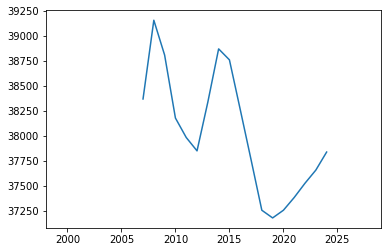

In [7]:
from spark.sentencing_policy_impact_v1.historical_data import total_state_responsible_adult_population
population_change = test_results.groupby(level=0).sum()['total_population'] - counterfactual_results.groupby(level=0).sum()['total_population']
policy_projection = total_state_responsible_adult_population + population_change
policy_projection.plot()


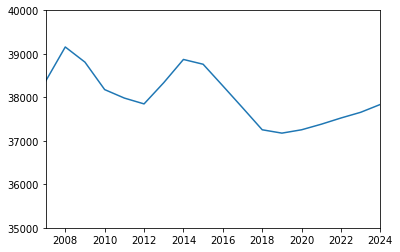

In [10]:
total_state_responsible_adult_population.plot(ylim=[35000,40000])


/Users/justine/.local/share/virtualenvs/recidiviz-research--v7DE6HN/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


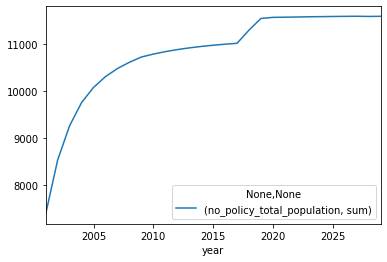

In [12]:
simulation_results = format_simulation_results(test_results, 'no_policy')
# simulation_results = simulation_results.merge(format_simulation_results(no_policy_results, 'no_policies'), 
#                                               on=['compartment', 'year'])
simulation_results = simulation_results[(simulation_results['compartment'] != 'pretrial')]
simulation_results_plot = simulation_results[(simulation_results['year'] >2000)]
simulation_results_plot[simulation_results_plot['compartment'] != 'release'].groupby('year').sum().plot()


In [13]:
test_data['year'].value_counts(dropna=False)

[2000    816.000000
 2001    407.110465
 2002    136.395349
 2003     55.447674
 2004     26.686047
 2005     12.453488
 2006      6.523256
 2007      3.558140
 2008      2.372093
 2009      2.075581
 2010      1.482558
 2011      0.704215
 2012      0.334502
 2013      0.158889
 2014      0.075472
 2015      0.035849
 2016      0.017028
 2017      0.008088
 2018      0.003842
 2019      0.001825
 2020      0.000867
 2021      0.000412
 2022      0.000196
 2023      0.000093
 2024      0.000044
 2025      0.000021
 2026      0.000010
 2027      0.000005
 2028      0.000002
 2029      0.000001
 dtype: float64,
 2000    61.000000
 2001    38.039326
 2002    11.651685
 2003     2.741573
 2004     0.342697
 2005     0.342697
 2006     0.342697
 2007     0.000000
 dtype: float64,
 2000    245.000000
 2001    243.244986
 2002    238.330946
 2003    176.905444
 2004    139.699140
 2005    105.300860
 2006     70.902579
 2007     58.266476
 2008     41.418338
 2009     29.133238
 2010     16.4

In [26]:
test_data[test_data['effective_sentence_years'] <= 1]['year'].value_counts(dropna=False)

2019.0    3924
2018.0    3619
2017.0    3258
Name: year, dtype: int64

In [5]:
test_data = jail_prison_admissions[jail_prison_admissions['simulation_group_name'] == 'NAR3038']
test_sim = population_simulation.PopulationSimulation()
test_results = test_sim.simulate_sentencing_policies(test_data, user_inputs, policy_df)
test_results

initialization time:  0.005460023880004883
simulation_time:  1.8137788772583008


,total_population,compartment,year,simulation_group
2000,245.000000,prison,2000,NAR3038
2001,488.244986,prison,2001,NAR3038
2002,726.575931,prison,2002,NAR3038
2003,903.481375,prison,2003,NAR3038
2004,1043.180516,prison,2004,NAR3038
...,...,...,...,...
2025,0.000000,pretrial,2025,NAR3038
2026,0.000000,pretrial,2026,NAR3038
2027,0.000000,pretrial,2027,NAR3038
2028,0.000000,pretrial,2028,NAR3038


Text(0.5, 1.0, 'Total Population for Group NAR3038')

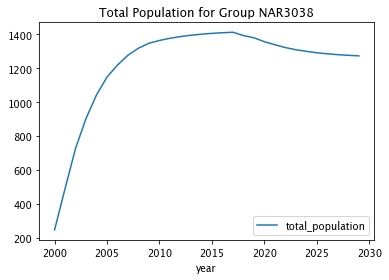

In [6]:
test_results[test_results['compartment'] == 'prison'].plot(x='year', y='total_population')
plt.title(f"Total Population for Group {', '.join(test_results['simulation_group'].unique())}")

In [12]:
test_sim_cohorts = test_sim.sub_simulations['NAR3038'].simulation_compartments['prison'].get_cohort_table()
test_sim_cohorts[range(2015, 2022)]

,2015,2016,2017,2018,2019,2020,2021
2000,4.811581,3.760657,2.939270,2.297288,1.795524,1.403354,1.096839
2001,6.156189,4.811581,3.760657,2.939270,2.297288,1.795524,1.403354
2002,7.876551,6.156189,4.811581,3.760657,2.939270,2.297288,1.795524
2003,10.077673,7.876551,6.156189,4.811581,3.760657,2.939270,2.297288
2004,12.893902,10.077673,7.876551,6.156189,4.811581,3.760657,2.939270
2005,16.497135,12.893902,10.077673,7.876551,6.156189,4.811581,3.760657
2006,29.133238,16.497135,12.893902,10.077673,7.876551,6.156189,4.811581
2007,41.418338,29.133238,16.497135,12.893902,10.077673,7.876551,6.156189
2008,58.266476,41.418338,29.133238,16.497135,12.893902,10.077673,7.876551
2009,70.902579,58.266476,41.418338,29.133238,16.497135,12.893902,10.077673


Text(0.5, 1.0, 'Total Population per Cohort for NAR3038')

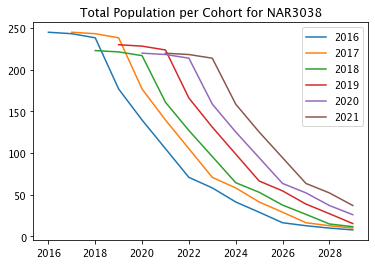

In [16]:
test_sim_cohorts.loc[range(2016, 2022)].transpose().plot()
plt.title(f"Total Population per Cohort for {', '.join(test_results['simulation_group'].unique())}")

In [14]:
test_sim.sub_simulations['NAR3038'].simulation_compartments['pretrial'].historical_data

,2017.0,2018.0,2019.0
prison,205,186,192
jail,2,1,0


In [19]:
test_data['year'].value_counts(dropna=False)

2017.0    247
2019.0    230
2018.0    224
Name: year, dtype: int64

In [56]:
releases_2015 = 0
for i in [test_sim.sub_simulations[i].simulation_compartments['release'].cohorts for i in test_sim.sub_simulations]:
    for j in i:
        try:
            j.get_all_year_end_projections()[2014]
                
        except:
            try:
                releases_2015 += j.get_all_year_end_projections()[2015]
            except:
                pass
releases_2015


5308.31112389623

In [9]:
3/4*releases_2015

3339.394482298573

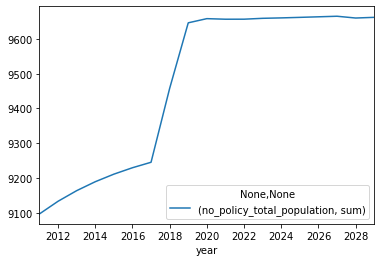

In [10]:
simulation_results = format_simulation_results(test_results, 'no_policy')
# simulation_results = simulation_results.merge(format_simulation_results(no_policy_results, 'no_policies'), 
#                                               on=['compartment', 'year'])
simulation_results = simulation_results[(simulation_results['compartment'] != 'pretrial')]
simulation_results_plot = simulation_results[(simulation_results['year'] >2010)]
simulation_results_plot[simulation_results_plot['compartment'] != 'release'].groupby('year').sum().plot()


In [ ]:
#FULL SYSTEM SIM BELOW: TAKES 10 MINS TO LOAD SO TRY NOT TO RE-RUN

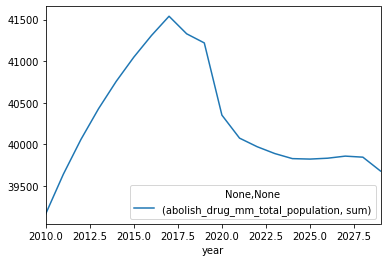

In [18]:
simulation_results = format_simulation_results(test_results, 'abolish_drug_mm')
# simulation_results = simulation_results.merge(format_simulation_results(no_policy_results, 'no_policies'), 
#                                               on=['compartment', 'year'])
simulation_results = simulation_results[(simulation_results['compartment'] != 'pretrial')]
simulation_results = simulation_results[(simulation_results['year'] >= 2010)]
simulation_results[simulation_results['compartment'] != 'release'].groupby('year').sum().plot()

In [20]:
#all
test_results.loc[2019].groupby('compartment').sum() - test_results.loc[2025].groupby('compartment').sum()

,total_population,year
compartment,,
jail,353.769623,-1482
pretrial,0.000000,-1482
prison,1042.811534,-1482
release,-54269.100162,-1482


In [21]:
releases_2015 = 0
for i in [test_sim.sub_simulations[i].simulation_compartments['release'].cohorts for i in test_sim.sub_simulations]:
    for j in i:
        try:
            j.get_all_year_end_projections()[2015]
                
        except:
            try:
                releases_2015 += j.get_all_year_end_projections()[2016]
            except:
                pass
releases_2015


17526.263385529048

In [ ]:
count = 0
l = 0
for id, offense in historical_admissions.sort_values('effective_sentence_years').iterrows():
    if count < 0.95 * len(historical_admissions):
        l = offense['effective_sentence_years']
        count += 1
    else:
        break
count = 0
for id, offense in historical_admissions.iterrows():
    print(offense['effective_sentence_years'])
    if (10 == offense['effective_sentence_years']):
        count += 1
    else:
        break
count

In [ ]:


prison_type_1_assault = historical_admissions[(historical_admissions['sentence_type'] == 'prison')
                                              & (historical_admissions['offense_group'] == 'ASSAULT')
                                              & (historical_admissions['offense_category_code'] == 1)]
print(len(prison_type_1_assault))

prison_type_0_assault = historical_admissions[(historical_admissions['sentence_type'] == 'prison')
                                              & (historical_admissions['offense_group'] == 'ASSAULT')
                                              & (historical_admissions['offense_category_code'] == 0.0)]
print(len(prison_type_0_assault))

prison_type_1_assault_transitions = incarceration_transitions.IncarceratedTransitions(['prison','release','jail'])
prison_type_1_assault_transitions.generate_transition_tables(prison_type_1_assault)
prison_type_1_assault_transitions.normalize_transitions()

prison_type_0_assault_transitions = incarceration_transitions.IncarceratedTransitions(['prison','release','jail'])
prison_type_0_assault_transitions.generate_transition_tables(prison_type_0_assault)
prison_type_0_assault_transitions.normalize_transitions()


In [ ]:
prison_type_1_assault_transitions.transition_df.plot()
plt.title('transition probabilities vs time in prison for type-1 assault')
prison_type_0_assault_transitions.transition_df.plot()
plt.title('transition probabilities vs time in prison for type-0 assault')

In [ ]:
default_transition_class = incarceration_transitions.IncarceratedTransitions(['release'])
default_transition_class.generate_transition_tables(prison_type_1_assault)
default_transition_class.normalize_transitions()

In [ ]:
mm_reduction_5y = partial(incarceration_transitions.IncarceratedTransitions.apply_mandatory_minimum_reduction, 
                          sentence_reduction_years=5)

mm_reduction_5y_transition_class = incarceration_transitions.IncarceratedTransitions(['release'])
mm_reduction_5y_transition_class.generate_transition_tables(prison_type_1_assault)
mm_reduction_5y(mm_reduction_5y_transition_class)
mm_reduction_5y_transition_class.normalize_transitions()

In [ ]:
mm_reduction_5y_transition_class.transition_df.plot()
default_transition_class.transition_df.plot()

In [ ]:
abolish_mm_transition_class = incarceration_transitions.IncarceratedTransitions(['release'])
abolish_mm_transition_class.generate_transition_tables(prison_type_1_assault)
abolish_mm_transition_class.apply_mandatory_minimum_reduction()
abolish_mm_transition_class.normalize_transitions()
abolish_mm_transition_class.transition_df.plot()

In [ ]:
prison_type_1_assault['effective_sentence_years'].describe()